In [18]:
# Importamos las librerías de keras/tensorflow
from tensorflow import keras
from tensorflow.keras import layers


In [27]:
# Importamos la librería de los datasets de keras y cogemos el de boston_housing
from tensorflow.keras.datasets import boston_housing

# Obtenemos los datos de entrenamiento y test
# separados en las variables explicativas y la objetivo
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
train_data.shape
test_data.shape





SyntaxError: invalid syntax (1664919177.py, line 8)

**Normalización**

In [20]:
# Realizamos la "Normalización" restando la media y dividiendo por la desviación típica
# Ahora tendremos valores (-x,x) alredor de 0, pero en general pequeños
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [32]:
# Creamos el modelo

# Inicializamos el API Secuencial de capas
model = keras.Sequential([
        # Añadimos capa de entrada con las 13 variables explicativas
        keras.Input(shape=(13,)),
        # Añadimos capa densamente conectada con 64 neuronas y activación relu
        layers.Dense(64, activation="relu"),
        # Añadimos capa densamente conectada con 64 neuronas y activación relu
        layers.Dense(64, activation="relu"),
        # Añadimos capa de salida densamente conectada con 1 neurona y activación lineal (para regresión)
        layers.Dense(1)
    ])

# Mostramos el Modelo creado
model.summary()

# Compilamos el modelo definiendo el optimizador, función de pérdida y métrica
# RMSProp, mse, mae
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Realizamos el entrenamiento
# 130 épocos (iteraciones), con tamaño de batch de 16
history = model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5286 - mae: 1.9976 


dict_keys(['loss', 'mae'])


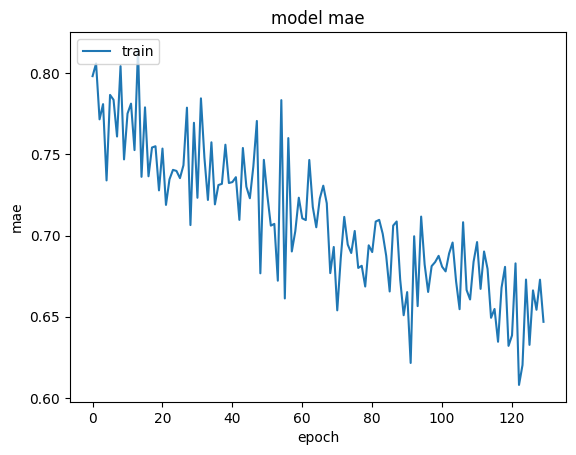

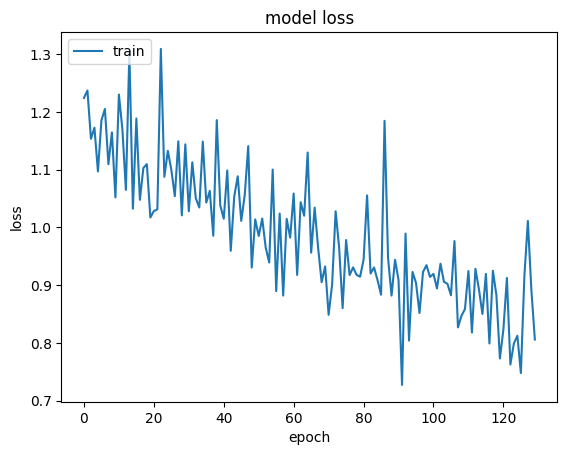

In [38]:
# Importamos la librería de pyplot para pintar gráficas
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mae'])
#plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
# Evaluamos el modelo con los datos de test
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([83.29408], dtype=float32)